In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
#df_ccog = pd.read_csv('Exp_2_CCoG_TOC_EW.csv')
#df_vcog = pd.read_csv('Exp_2_VCoG_TOC_EW.csv')

df_ccog = pd.read_csv('Exp_1_CCoG_TOC.csv')
df_vcog = pd.read_csv('Exp_1_VCoG_TOC.csv')

In [3]:
print(df_ccog.head())

    Timestamp   Timeofday  Cable_X_pos  Cable_Y_pos  Cable_Z_pos  \
0  1759744831  120030.777  619487.0762  5806174.614      40.4695   
1  1759744831  120030.980  619487.0762  5806174.614      40.4695   
2  1759744831  120031.200  619487.0760  5806174.615      40.4685   
3  1759744831  120031.401  619487.0785  5806174.611      40.4724   
4  1759744832  120031.603  619487.0782  5806174.612      40.4681   

   Cable_offset_X  Cable_offset_Y  Cable_offset_Z  Norm_X_comp  Norm_Y_comp  \
0            0.02            0.06           -1.09          0.0          1.0   
1            0.02            0.06           -1.09          0.0          1.0   
2            0.02            0.06           -1.09          0.0          1.0   
3            0.02            0.06           -1.08          0.0          1.0   
4            0.02            0.05           -1.09          0.0          1.0   

   Norm_Z_comp  Cable_lock  
0         0.05           1  
1         0.05           1  
2         0.05           1  


In [4]:
# delete from df_ccog and df_vcog any entries that have Cable_lock!=1
df_ccog = df_ccog[df_ccog['Cable_lock'] == 1].reset_index(drop=True)
df_vcog = df_vcog[df_vcog['Cable_lock'] == 1].reset_index(drop=True) 

In [5]:
# check if the magnitude of the normalized components is 1

norm_x = df_ccog['Norm_X_comp']
norm_y = df_ccog['Norm_Y_comp']
norm_z = df_ccog['Norm_Z_comp']

print(np.sqrt(norm_x**2 + norm_y**2 + norm_z**2).mean())

0.9287728787766404


In [6]:
# check the difference between Cart_Z_pos and Cable_offset_Z

cart_z = df_vcog['Cart_Z_pos']
cable_offset_z = df_ccog['Cable_offset_Z']
cable_pos = df_ccog['Cable_Z_pos']

diff = cart_z - cable_offset_z
print(diff.mean())
print(cable_pos.mean())

42.45224342444559
40.41210201134606


In [7]:
# check the difference between Cart_X_pos and Cable_offset_X

cart_X = df_vcog['Cart_X_pos']
cable_offset_x = df_ccog['Cable_offset_X']
cable_pos = df_ccog['Cable_X_pos']

diff = cart_X - cable_offset_x
print(diff.mean())
print(cable_pos.mean())

619483.0240665291
619483.0232277721


In [8]:
# check the difference between Cart_Y_pos and Cable_offset_Y

cart_y = df_vcog['Cart_Y_pos']
cable_offset_y = df_ccog['Cable_offset_Y']
cable_pos = df_ccog['Cable_Y_pos']

diff = cart_y - cable_offset_y
print(diff.mean())
print(cable_pos.mean())

5806124.455853533
5806124.487011862


(np.float64(619424.3975000001),
 np.float64(619551.3925),
 np.float64(5806067.125949999),
 np.float64(5806184.937050001))

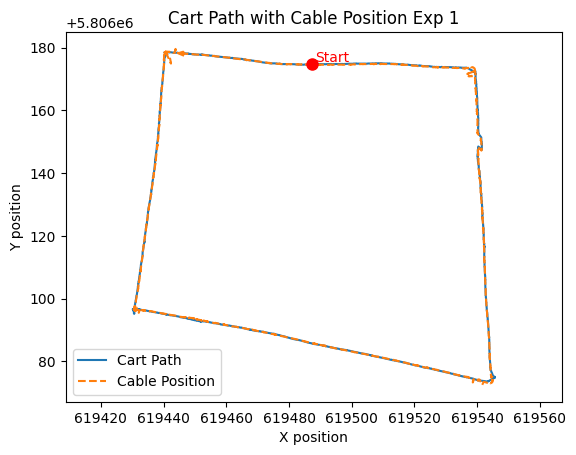

In [9]:
cart_x = df_vcog['Cart_X_pos']
cart_y = df_vcog['Cart_Y_pos']
cable_x = df_ccog['Cable_X_pos']
cable_y = df_ccog['Cable_Y_pos']

# plot cart path + cable path
plt.plot(cart_x, cart_y)
plt.plot(cable_x, cable_y, linestyle='--')
# mark start point at given coordinates
plt.plot(cart_x.iloc[0], cart_y.iloc[0], marker='o', markersize=8, color='red')
plt.text(cart_x.iloc[0]+1, cart_y.iloc[0]+1, 'Start', color='red')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.legend(['Cart Path', 'Cable Position'])
plt.title('Cart Path with Cable Position Exp 1')
plt.axis('equal')

Text(0.5, 1.0, 'Zoomed In: Cart Path with Cable Position Exp 1')

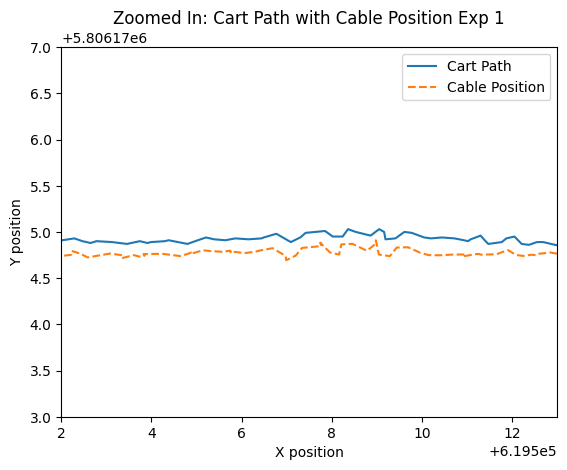

In [10]:
# plot cart path + cable path
plt.plot(cart_x, cart_y)
plt.plot(cable_x, cable_y, linestyle='--')
# mark start point at given coordinates
plt.plot(cart_x.iloc[0], cart_y.iloc[0], marker='o', markersize=8, color='red')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.xlim(619502, 619513)
plt.ylim(5806173, 5806177)
plt.legend(['Cart Path', 'Cable Position'])
plt.title('Zoomed In: Cart Path with Cable Position Exp 1')

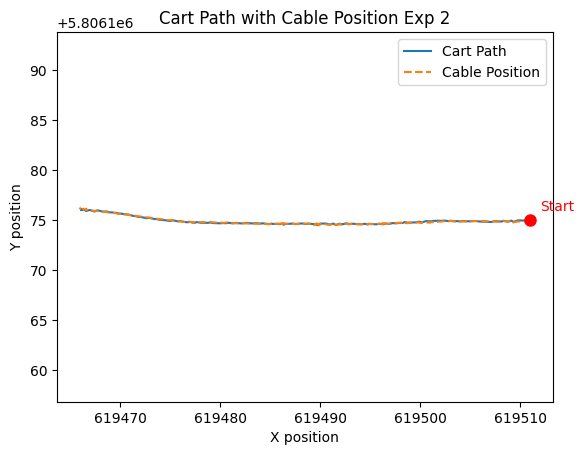

In [11]:
# plot cart path + cable position for experiment 2
df_ccog_exp2 = pd.read_csv('Exp_2_CCoG_TOC_EW.csv')
df_vcog_exp2 = pd.read_csv('Exp_2_VCoG_TOC_EW.csv')
cart_x_exp2 = df_vcog_exp2['Cart_X_pos']
cart_y_exp2 = df_vcog_exp2['Cart_Y_pos']
cable_x_exp2 = df_ccog_exp2['Cable_X_pos']
cable_y_exp2 = df_ccog_exp2['Cable_Y_pos']
plt.plot(cart_x_exp2, cart_y_exp2, label='Cart Path')
plt.plot(cable_x_exp2, cable_y_exp2, label='Cable Position', linestyle='--')
# mark start point at given coordinates
plt.plot(cart_x_exp2.iloc[0], cart_y_exp2.iloc[0], marker='o', markersize=8, color='red')
plt.text(cart_x_exp2.iloc[0]+1, cart_y_exp2.iloc[0]+1, 'Start', color='red')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.title('Cart Path with Cable Position Exp 2')
plt.legend()
plt.axis('equal')
plt.show()

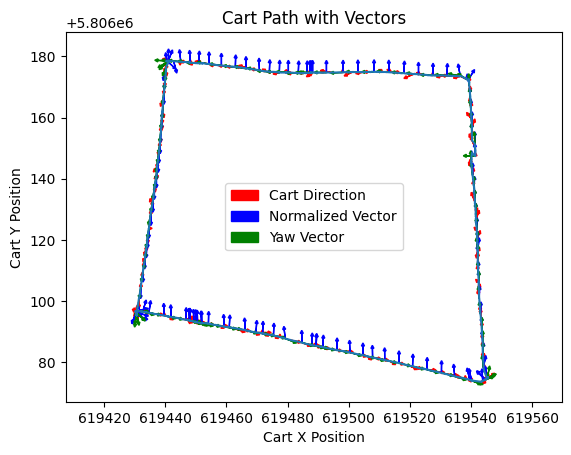

In [12]:
cart_x = df_vcog['Cart_X_pos']
cart_y = df_vcog['Cart_Y_pos']

# plot cart path + direction arrows
plt.plot(cart_x, cart_y)
for i in range(0, len(cart_x), 20):
    if i + 1 < len(cart_x):
        plt.arrow(cart_x[i], cart_y[i], (cart_x[i + 1] - cart_x[i])*10, (cart_y[i + 1] - cart_y[i])*10,
                  head_width=1, head_length=1, fc='red', ec='red')
        
# add direction arrows for the heading vector (0 at North convention)
norm_vect_x = df_ccog['Norm_X_comp']
norm_vect_y = df_ccog['Norm_Y_comp']
norm_heading = np.arctan2(norm_vect_x, norm_vect_y)  # heading measured from North
for i in range(0, len(cart_x), 30):
    plt.arrow(cart_x[i], cart_y[i], np.sin(norm_heading[i]) * 3, np.cos(norm_heading[i]) * 3,
              head_width=1, head_length=1, fc='blue', ec='blue')
    
# add direction arrows for yaw (0 at North convention)
yaw = (df_vcog['Yaw']) * np.pi / 180  # convert to radians
for i in range(0, len(cart_x), 30):
    plt.arrow(cart_x[i], cart_y[i], np.sin(yaw[i]) * 3, np.cos(yaw[i]) * 3,
              head_width=1, head_length=1, fc='green', ec='green')

# add mpatches for legend
cart_patch = mpatches.Patch(color='red', label='Cart Direction')
heading_patch = mpatches.Patch(color='blue', label='Normalized Vector')
yaw_patch = mpatches.Patch(color='green', label='Yaw Vector')

plt.xlabel('Cart X Position')
plt.ylabel('Cart Y Position')
plt.title('Cart Path with Vectors')
plt.axis('equal')
plt.legend(handles=[cart_patch, heading_patch, yaw_patch])
plt.show()

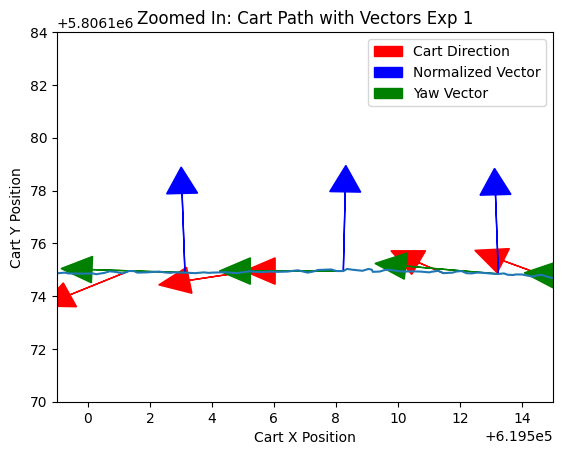

In [13]:
# plot cart path + direction arrows
plt.plot(cart_x, cart_y)
for i in range(0, len(cart_x), 20):
    if i + 1 < len(cart_x):
        plt.arrow(cart_x[i], cart_y[i], (cart_x[i + 1] - cart_x[i])*10, (cart_y[i + 1] - cart_y[i])*10,
                  head_width=1, head_length=1, fc='red', ec='red')
        
# add direction arrows for the heading vector (0 at North convention)
norm_vect_x = df_ccog['Norm_X_comp']
norm_vect_y = df_ccog['Norm_Y_comp']
norm_heading = np.arctan2(norm_vect_x, norm_vect_y) # heading measured from North
for i in range(0, len(cart_x), 30):
    plt.arrow(cart_x[i], cart_y[i], np.sin(norm_heading[i]) * 3, np.cos(norm_heading[i]) * 3,
              head_width=1, head_length=1, fc='blue', ec='blue')
    
# add direction arrows for yaw (0 at North convention)
yaw = (df_vcog['Yaw']) * np.pi / 180  # convert to radians
for i in range(0, len(cart_x), 30):
    plt.arrow(cart_x[i], cart_y[i], np.sin(yaw[i]) * 3, np.cos(yaw[i]) * 3,
              head_width=1, head_length=1, fc='green', ec='green')

# add mpatches for legend
cart_patch = mpatches.Patch(color='red', label='Cart Direction')
heading_patch = mpatches.Patch(color='blue', label='Normalized Vector')
yaw_patch = mpatches.Patch(color='green', label='Yaw Vector')


plt.xlabel('Cart X Position')
plt.ylabel('Cart Y Position')
plt.title('Zoomed In: Cart Path with Vectors Exp 1')
plt.xlim(619499, 619515)
plt.ylim(5806170, 5806184)
plt.legend(handles=[cart_patch, heading_patch, yaw_patch])
plt.show()

In [14]:
cart_x = df_vcog['Cart_X_pos']
cart_y = df_vcog['Cart_Y_pos']
cart_z = df_vcog['Cart_Z_pos']

cable_x = df_ccog['Cable_X_pos']
cable_y = df_ccog['Cable_Y_pos']
cable_z = df_ccog['Cable_Z_pos']

offset_scale = 1 # keep 1 is offsets are in meters
ox = df_ccog['Cable_offset_X'] * offset_scale 
oy = df_ccog['Cable_offset_Y'] * offset_scale
oz = df_ccog['Cable_offset_Z'] * offset_scale

yaw_corr = (df_vcog['Yaw'] + 180) * np.pi / 180 # add 180 to yaw for correction (rad)

# below we have the equations i derived on the slides
cable_x_yaw180 = cart_x + ox * np.cos(yaw_corr) + oy * np.sin(yaw_corr)
cable_y_yaw180 = cart_y - ox * np.sin(yaw_corr) + oy * np.cos(yaw_corr)
cable_z_yaw180 = cart_z + oz

# rms error
mask = np.isfinite(cable_x) & np.isfinite(cable_y) & np.isfinite(cable_z) & np.isfinite(cable_x_yaw180) & np.isfinite(cable_y_yaw180) & np.isfinite(cable_z_yaw180)
rms_error_original = np.sqrt(np.mean((cart_x[mask] - cable_x[mask])**2 + (cart_y[mask] - cable_y[mask])**2 + (cart_z[mask] - cable_z[mask])**2))
rms_error_yaw180 = np.sqrt(np.mean((cart_x[mask] - cable_x_yaw180[mask])**2 + (cart_y[mask] - cable_y_yaw180[mask])**2 + (cart_z[mask] - cable_z_yaw180[mask])**2))
print(f"RMS Error (Original Cable Pos): {rms_error_original:.10f} m")
print(f"RMS Error (Cable Pos from Yaw+180): {rms_error_yaw180:.10f} m")

cx = cart_x.values
cy = cart_y.values

dx = np.r_[np.diff(cx), np.nan] # compute differences between consecutive points
dy = np.r_[np.diff(cy), np.nan]
speed = np.hypot(dx, dy)
speed[speed == 0] = np.nan

tx = dx / speed
ty = dy / speed
rx = ty
ry = -tx

def point_to_segment_dist(px, py, ax, ay, bx, by):
    """
    Compute the distance from point P(px, py) to the line segment AB (ax, ay)-(bx, by).
    Returns the distance as a numpy array.
    """
    abx = bx - ax
    aby = by - ay
    apx = px - ax
    apy = py - ay
    ab2 = abx * abx + aby * aby
    ab2[ab2 == 0] = np.nan
    t = (apx * abx + apy * aby) / ab2
    t = np.clip(t, 0.0, 1.0)
    qx = ax + t * abx
    qy = ay + t * aby
    return np.hypot(px - qx, py - qy)

try:
    from scipy.spatial import cKDTree
    tree = cKDTree(np.column_stack([cx, cy]))
    have_kdtree = True
except Exception:
    have_kdtree = False

def dist_to_polyline(px, py):
    """
    Compute the distance from points P(px, py) to the polyline defined by (cx, cy).
    Returns the distance as a numpy array.
    """
    if not have_kdtree:
        ex = px - cx
        ey = py - cy
        return np.abs(ex * rx + ey * ry)

    _, idx = tree.query(np.column_stack([px, py]), k=1)
    idx = idx.astype(int)
    i0 = np.clip(idx - 1, 0, len(cx) - 2)
    i1 = np.clip(idx, 0, len(cx) - 2)

    d0 = point_to_segment_dist(px, py, cx[i0], cy[i0], cx[i0 + 1], cy[i0 + 1])
    d1 = point_to_segment_dist(px, py, cx[i1], cy[i1], cx[i1 + 1], cy[i1 + 1])
    return np.minimum(d0, d1)

def summarize(px, py, label, finite_mask):
    """
    Summarize cross-track and distance-to-polyline errors.
    """
    ex = px - cx
    ey = py - cy

    cross_track = ex * rx + ey * ry
    dist_poly   = dist_to_polyline(px, py)

    m = finite_mask & np.isfinite(cross_track) & np.isfinite(dist_poly)

    ct_rmse = np.sqrt(np.mean(cross_track[m] ** 2))
    ct_mae  = np.mean(np.abs(cross_track[m]))
    ct_p95  = np.percentile(np.abs(cross_track[m]), 95)

    dp_rmse = np.sqrt(np.mean(dist_poly[m] ** 2))
    dp_mae  = np.mean(dist_poly[m])
    dp_p95  = np.percentile(dist_poly[m], 95)

    print(f"\n[{label}]")
    print(f"Cross-track | RMSE: {ct_rmse:.4f} m, MAE: {ct_mae:.4f} m, p95(|.|): {ct_p95:.4f} m")
    print(f"Dist-to-poly | RMSE: {dp_rmse:.4f} m, MAE: {dp_mae:.4f} m, p95: {dp_p95:.4f} m")

# use masks to make sure i only compute stats on valid data
mask_dataset  = np.isfinite(cable_x.values) & np.isfinite(cable_y.values) & np.isfinite(cx) & np.isfinite(cy)
mask_computed = np.isfinite(cable_x_yaw180.values) & np.isfinite(cable_y_yaw180.values) & np.isfinite(cx) & np.isfinite(cy)

base_mask = mask.values

# print summaries
summarize(cable_x.values, cable_y.values, "Dataset cable (CCOG Cable_X/Y)", base_mask & mask_dataset)
summarize(cable_x_yaw180.values, cable_y_yaw180.values, "Computed cable (from cart+offsets+yaw_corr)", base_mask & mask_computed)


RMS Error (Original Cable Pos): 1.0645677031 m
RMS Error (Cable Pos from Yaw+180): 1.0644435021 m

[Dataset cable (CCOG Cable_X/Y)]
Cross-track | RMSE: 0.2216 m, MAE: 0.1351 m, p95(|.|): 0.4458 m
Dist-to-poly | RMSE: 0.1912 m, MAE: 0.1201 m, p95: 0.4075 m

[Computed cable (from cart+offsets+yaw_corr)]
Cross-track | RMSE: 0.2063 m, MAE: 0.1131 m, p95(|.|): 0.4117 m
Dist-to-poly | RMSE: 0.2296 m, MAE: 0.1239 m, p95: 0.5258 m


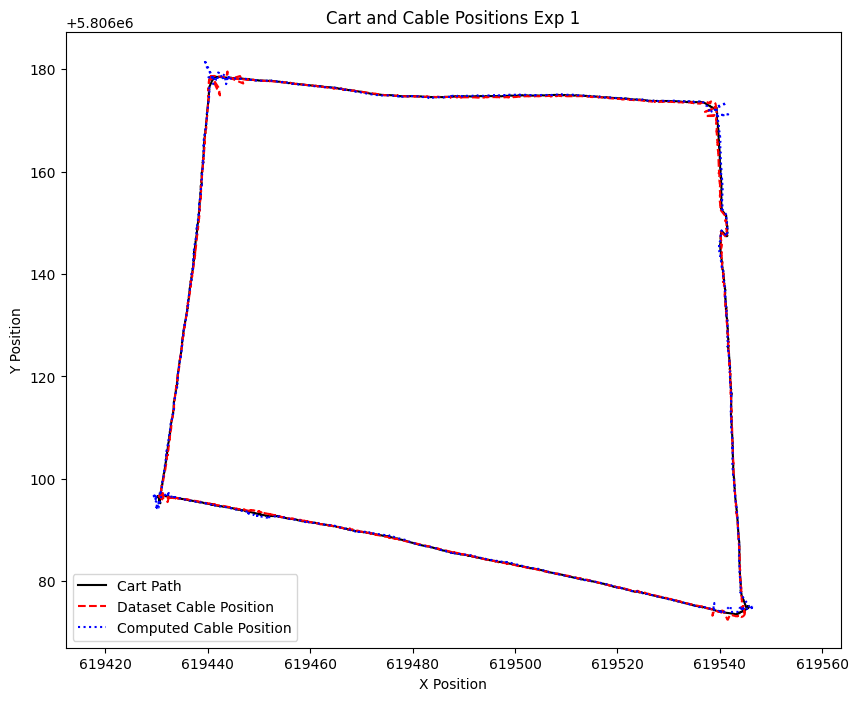

In [15]:
# plot the path of the cart, the yaw-corrected cable position, and the original cable position
plt.figure(figsize=(10, 8))
plt.plot(cart_x, cart_y, label='Cart Path', color='black')
plt.plot(cable_x, cable_y, linestyle='--', label='Dataset Cable Position', color='red')
plt.plot(cable_x_yaw180, cable_y_yaw180, linestyle=':', label='Computed Cable Position', color='blue')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Cart and Cable Positions Exp 1')
plt.axis('equal')
plt.legend()

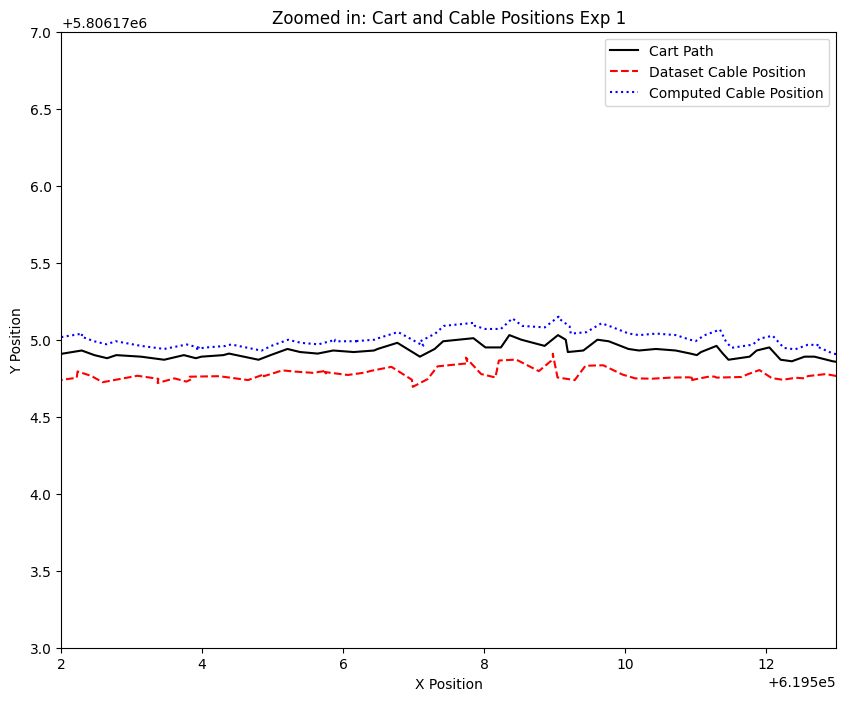

In [16]:
# plot the path of the cart, the yaw-corrected cable position, and the original cable position
plt.figure(figsize=(10, 8))
plt.plot(cart_x, cart_y, label='Cart Path', color='black')
plt.plot(cable_x, cable_y, linestyle='--', label='Dataset Cable Position', color='red')
plt.plot(cable_x_yaw180, cable_y_yaw180, linestyle=':', label='Computed Cable Position', color='blue')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.xlim(619502, 619513)
plt.ylim(5806173, 5806177)
plt.title('Zoomed in: Cart and Cable Positions Exp 1')
plt.legend()